In [126]:
from mnist_loader import load_data_wrapper
import numpy as np
import random
import matplotlib.pyplot as plt

In [127]:
training_data, validation_data, test_data = load_data_wrapper()

In [128]:
def plot_images(images):
    "Plot a list of MINST images."
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [129]:
def predict(images, W1, W2, B1, B2):
    predictions = []
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(np.argmax(a))
    return predictions

In [ ]:
# Implement σ(x)

In [130]:
def sigmoid(x):
    """The sigmoid function."""
    return 1/(1+np.exp(-x))

In [ ]:
# Implement the derivative of σ. Hint: σ'(χ) =σ(χ)(1-σ(χ)))

In [131]:
def sigmoid_prime(x):
    """Derivative of the sigmoid function."""
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
# Implement the score function
#### ATTENTION! Don't forget to load the previous notebook! Carrying the functions is vital!

In [132]:
def f(x, W1,W2,B1,B2):
    """Return the output of the network if 'x' is input image and 
    W1,W2,B1,B2 are the learnable weights."""
    Z1 = np.dot(W1,x)+B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = sigmoid(Z2)
    return A2

In [ ]:
# Implement vectorize_mini_batch

In [133]:
def vectorize_mini_batch(mini_batch):
    """Given a minibatch of (image,label) tuple of a certain size
    return the tuple X,Y where x contains all of the images and Y contains
    all of the labels stacked horizontally"""
    mini_batch_x = []
    mini_batch_y = []
    for k in range(0, len(mini_batch)):
        mini_batch_x.append(mini_batch[k][0])
        mini_batch_y.append(mini_batch[k][1])
        
    X = np.hstack(mini_batch_x)
    Y = np.hstack(mini_batch_y)
    return X, Y

In [ ]:
# Implement gradient descent

In [134]:
def SGD(training_data, epochs, mini_batch_size, eta, test_data):
    """Gradient descent.
    Epochs: The number of times the entire training_data is examined.
    mini_batch_size: the number of images used to approximate the gradient each step of gradient descent.
    eta: the learning rate or the step size.
    test_data: check accuracy of the model against the test_data every epoch
    """
    n = len(training_data)
    n_test = len(test_data)
    
    W1 = np.random.randn(30,784)
    W2 = np.random.randn(10,30)
    B1 = np.random.randn(30,1)
    B2 = np.random.randn(10,1)
    
    for j in range(epochs):
        random.shuffle(training_data)
        for k in range(0, n, mini_batch_size):
            
            mini_batch = training_data[k: k+mini_batch_size]
            
            
            X, Y = vectorize_mini_batch(mini_batch)
            
            
            # feed forward
            Z1 = np.dot(W1,X)+B1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2,A1)+B2
            A2 = sigmoid(Z2)
            
            # backpropagate
            dZ2 = 1/mini_batch_size*(A2-Y)*sigmoid_prime(Z2)
            
            dW2 = np.dot(dZ2, A1.T)
            
            dB2 = 1/mini_batch_size*np.sum(dZ2, axis = 1, keepdims = True)
            
            dZ1 = 1/mini_batch_size*np.dot(W2.T, dZ2)*sigmoid_prime(Z1)
             
            dW1 = np.dot(dZ1, X.T)
            
            dB1 = 1/mini_batch_size*np.sum(dZ1, axis = 1, keepdims = True)
            
            # update parameters
            
            W2 = W2 - eta*dW2
            W1 = W1 - eta*dW1
            B2 = B2 - eta*dB2
            B1 = B1 - eta*dB1
            
            
        # after every epoch, check the accuracy of the model    
        test_results = [(np.argmax(f(x, W1, W2, B1, B2)), y) for (x, y) in test_data]
        num_correct = sum(int(x == y) for (x, y) in test_results)
        print("Epoch {} : {} / {}".format(j, num_correct, n_test));
        
    return W1, B1, W2, B2

In [135]:
W1, B1, W2, B2 = SGD(training_data, 30, 10, 3, test_data)

Epoch 0 : 7504 / 10000
Epoch 1 : 7841 / 10000
Epoch 2 : 8842 / 10000
Epoch 3 : 8951 / 10000
Epoch 4 : 9018 / 10000
Epoch 5 : 9077 / 10000
Epoch 6 : 9079 / 10000
Epoch 7 : 9198 / 10000
Epoch 8 : 9176 / 10000
Epoch 9 : 9202 / 10000
Epoch 10 : 9240 / 10000
Epoch 11 : 9247 / 10000
Epoch 12 : 9254 / 10000
Epoch 13 : 9258 / 10000
Epoch 14 : 9285 / 10000
Epoch 15 : 9286 / 10000
Epoch 16 : 9313 / 10000
Epoch 17 : 9308 / 10000
Epoch 18 : 9304 / 10000
Epoch 19 : 9309 / 10000
Epoch 20 : 9331 / 10000
Epoch 21 : 9318 / 10000
Epoch 22 : 9346 / 10000
Epoch 23 : 9338 / 10000
Epoch 24 : 9334 / 10000
Epoch 25 : 9336 / 10000
Epoch 26 : 9356 / 10000
Epoch 27 : 9351 / 10000
Epoch 28 : 9357 / 10000
Epoch 29 : 9357 / 10000


In [136]:
def predict(images, W1, W2, B1, B2):
    predictions = []
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(np.argmax(a))
    return predictions

In [137]:
predict(training_data[0:10], W1, W2, B1, B2)

[8, 6, 3, 0, 2, 3, 8, 8, 3, 6]

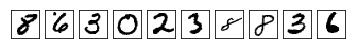

In [138]:
plot_images(training_data[0:10])